In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
market_caps = pd.read_csv("../data/stock_mktcaps.csv")
prices = pd.read_csv("../data/stock_prices.csv")


In [60]:
missing = market_caps.isna().sum()
for i in missing.index:    
    if missing[i] >= 1:
        market_caps = market_caps.drop(columns=[i])
        
missing_price = prices.isna().sum()
for i in missing_price.index:    
    if missing[i] >= 1:
        prices = prices.drop(columns=[i])

In [61]:
market_caps["date"] = pd.to_datetime(market_caps['date'])

market_caps = market_caps.set_index("date")

prices["date"] = pd.to_datetime(prices['date'])

prices = prices.set_index("date")

In [104]:
market_caps

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,687286,936980,361367,152198,871347,362603,502585,152288,779661,317449
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,2658.66,547.34,674.37,20901.61,392.39,268.07,1983.24,2784.07,483.04,1585.67,...,155.26,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2835.91,1195.35
2003-01-03,2679.51,547.34,674.37,21305.57,388.42,268.07,1937.44,2858.64,483.04,1609.16,...,161.01,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2855.47,1195.35
2003-01-06,2669.09,547.34,674.37,21729.07,388.42,270.19,1937.44,2982.93,483.04,1609.16,...,155.26,2240.00,16.35,18.71,53.90,240.75,20.54,14.10,2865.25,1195.35
2003-01-07,2658.66,547.34,668.55,23129.91,388.42,270.19,1937.44,3082.36,483.04,1585.67,...,149.51,2240.00,19.32,18.71,53.90,240.75,20.54,14.10,2884.80,1195.35
2003-01-08,2658.66,547.34,668.55,22308.95,388.42,270.19,1937.44,3057.51,483.04,1550.43,...,143.76,2240.00,19.32,18.71,53.90,240.75,20.65,14.10,2894.58,1157.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,10915.28,86.36,760.07,113598.50,13739.52,659.73,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1680.98,132.46,2873.02,1431.21,622.73,2599.43,37927.40,21410.80
2021-06-25,10884.50,86.36,760.07,114861.70,13739.52,661.93,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1715.28,132.46,2873.02,1374.83,622.73,2530.42,37405.35,21212.56
2021-06-28,10736.07,86.36,760.07,111606.30,13739.52,625.64,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1654.02,132.46,2873.02,1379.17,622.73,2530.42,37146.55,21225.77


In [121]:
filtered_market_cap = market_caps["2003-01-02":"2021-06-30"]
filtered_price = prices["2003-01-02":"2021-06-30"]

In [122]:
filtered_market_cap = filtered_market_cap.agg(np.mean).to_frame().reset_index()
filtered_price = filtered_price.agg(np.mean).to_frame().reset_index()

In [123]:
filtered_market_cap = filtered_market_cap.rename(columns={"index":"stock", 0:"avg market cap"})
filtered_price = filtered_price.rename(columns={"index":"stock", 0:"avg price"})


In [124]:
combined = pd.merge(filtered_market_cap, filtered_price, on="stock", how="inner")

In [125]:
combined["avg market cap"]

0       9644.891265
1        245.113918
2        757.682350
3      96858.343673
4       7691.867893
           ...     
219     1000.644530
220      736.351823
221     1295.501050
222    18738.034564
223     8243.148226
Name: avg market cap, Length: 224, dtype: float64

In [126]:
from sklearn.cluster import KMeans

In [128]:
km = KMeans(n_clusters=5)
km.fit(combined[["avg market cap", "avg price"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
clusters = pd.DataFrame(km.cluster_centers_, columns=["avg market cap", "avg price"], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'])

In [130]:
combined['Cluster'] = km.labels_ + 1
combined["Cluster"].unique()

array([1, 4, 3, 2, 5])

In [114]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(combined[["avg market cap", "avg price"]])
    inertia.append(estimator.inertia_)

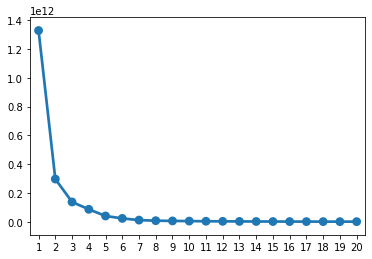

In [115]:
sns.pointplot(np.arange(1,21), inertia)

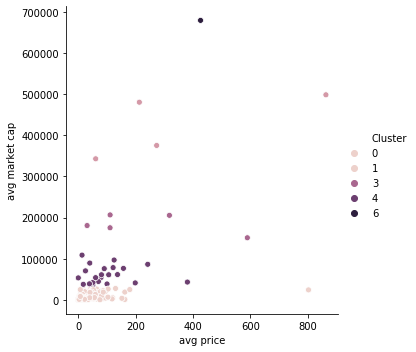

In [136]:
sns.relplot(y="avg market cap", x="avg price", data=combined, hue="Cluster")

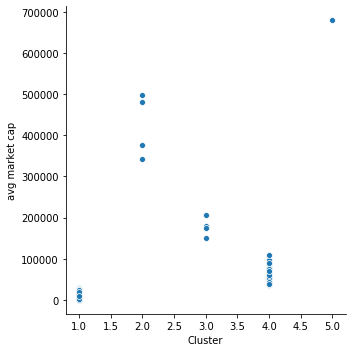

In [134]:
sns.relplot(x="Cluster", y="avg market cap", data=combined)

In [137]:
combined

,stock,avg market cap,avg price,Cluster
0,930060,9644.891265,79.413144,1
1,699903,245.113918,0.502768,1
2,879841,757.682350,7.549040,1
3,314909,96858.343673,125.330075,4
4,15362F,7691.867893,39.402792,1
...,...,...,...,...
219,362603,1000.644530,2.284512,1
220,502585,736.351823,3.532150,1
221,152288,1295.501050,3.207751,1
222,779661,18738.034564,87.490292,1
